#### (a)

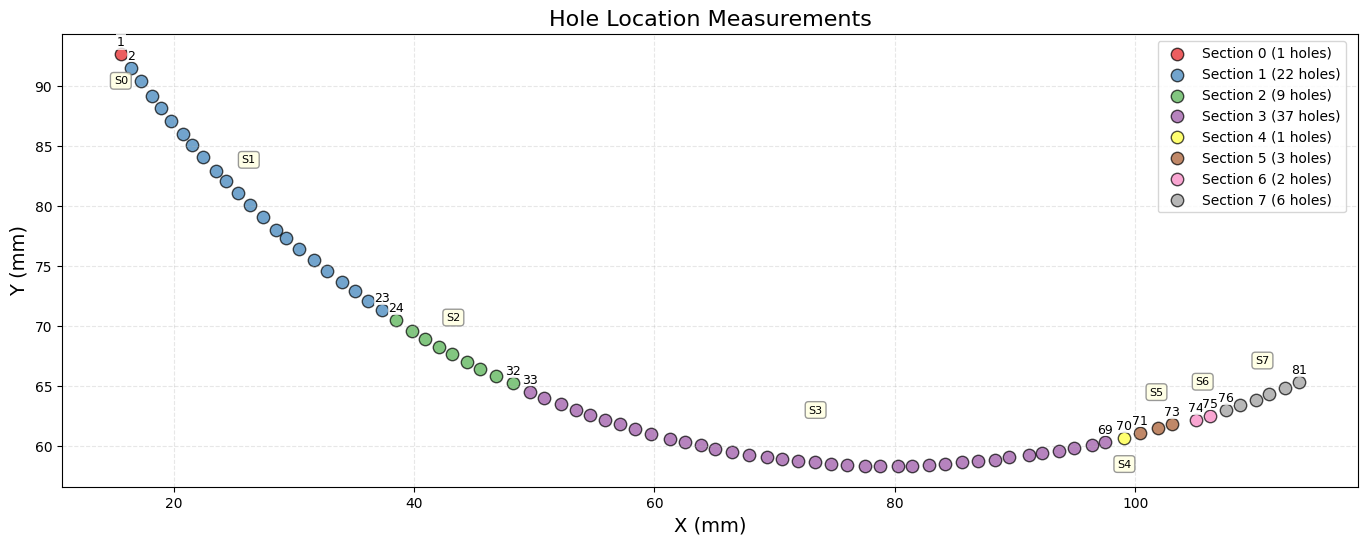

In [1]:
from pathlib import Path
from src import explore_data

parent_path = Path().resolve().parent
data_path = parent_path / "data/1-Fragment_C_Hole_Measurements.csv"
result_path = parent_path / "results"
result_path.mkdir(exist_ok=True)

explore_data(data_path, result_path)

#### (d)

In [ ]:
from tabulate import tabulate
import numpy as np
import pandas as pd
from pathlib import Path
from src import AntikytheraModel

parent_path = Path().resolve().parent
data = parent_path / "data/1-Fragment_C_Hole_Measurements.csv"

df = pd.read_csv(data)
data = np.array(df[['Mean(X)', 'Mean(Y)']])
sections = sorted(df['Section ID'].unique())
sorted_idxs = [list(df[df['Section ID'] == j]['Hole']) for j in sections]

model = AntikytheraModel(data, sorted_idxs)

# initialise
params_aniso = np.concatenate([[354], [100], [1, 1], np.zeros((8, 2)).flatten(), np.zeros(8)])
params_iso = np.concatenate([[354], [100], [1], np.zeros((8, 2)).flatten(), np.zeros(8)])

# check analytical gradients against numerical
aniso = model.check_grad(params_aniso, is_aniso=True)
iso = model.check_grad(params_iso, is_aniso=False)

# anisotropic
print("Anisotropic model gradient check:")
print(f"Max relative difference: {aniso['max_rel_diff']:.6e}")
aniso_table = []
for i in range(min(8, len(aniso['param_names']))):
    name = aniso['param_names'][i]
    analytical = aniso['analytical_grad'][i]
    numerical = aniso['numerical_grad'][i]
    rel_diff = aniso['rel_diff'][i]
    aniso_table.append([name, f"{analytical:.6f}", f"{numerical:.6f}", f"{rel_diff:.6e}"])

aniso_table.append(["...", "...", "...", "..."])
print(tabulate(aniso_table, headers=["Param", "Analytical", "Numerical", "Rel Diff"], tablefmt="rounded_grid"))


# isotropic
print("\nIsotropic model gradient check:")
print(f"Max relative difference: {iso['max_rel_diff']:.6e}")
iso_table = []
for i in range(min(8, len(iso['param_names']))):
    name = iso['param_names'][i]
    analy = iso['analy_grad'][i]
    num = iso['num_grad'][i]
    rel_diff = iso['rel_diff'][i]
    iso_table.append([name, f"{analy:.6f}", f"{num:.6f}", f"{rel_diff:.6e}"])

iso_table.append(["...", "...", "...", "..."])
print(tabulate(iso_table, headers=["Param", "Analytical", "Numerical", "Rel Diff"], tablefmt="rounded_grid"))


Anisotropic model gradient check:
Max relative difference: 1.099508e-06
╭─────────┬───────────────┬───────────────┬──────────────╮
│ Param   │ Analytical    │ Numerical     │ Rel Diff     │
├─────────┼───────────────┼───────────────┼──────────────┤
│ N       │ 509.029084    │ 509.029109    │ 2.431333e-08 │
├─────────┼───────────────┼───────────────┼──────────────┤
│ r       │ -2224.360999  │ -2224.361058  │ 1.322940e-08 │
├─────────┼───────────────┼───────────────┼──────────────┤
│ sigma_r │ 103645.695286 │ 103645.539784 │ 7.501622e-07 │
├─────────┼───────────────┼───────────────┼──────────────┤
│ sigma_t │ 283130.281859 │ 283129.857038 │ 7.502215e-07 │
├─────────┼───────────────┼───────────────┼──────────────┤
│ x0_0    │ -84.400690    │ -84.400672    │ 1.080141e-07 │
├─────────┼───────────────┼───────────────┼──────────────┤
│ y0_0    │ 92.596530     │ 92.596543     │ 7.157034e-08 │
├─────────┼───────────────┼───────────────┼──────────────┤
│ alpha_0 │ -1563.220455  │ -1563.220460  │

#### (e)

Finding maximum likelihood parameters for the isotropic model...
Gradient check error: 0.013173102108359305
Optimisation successful: False
Final negative log-likelihood: -154.78444554021746

Finding maximum likelihood parameters for the anisotropic model...
Gradient check error: 0.01570739555456199
Optimisation successful: False
Final negative log-likelihood: -95.84023135120377

Isotropic model maximum likelihood parameters:
N = 350.16
r = 76.24
sigma = 0.0931

Anisotropic model maximum likelihood parameters:
N = 316.11
r = 68.85
sigma_r = 0.1435
sigma_t = 0.1262


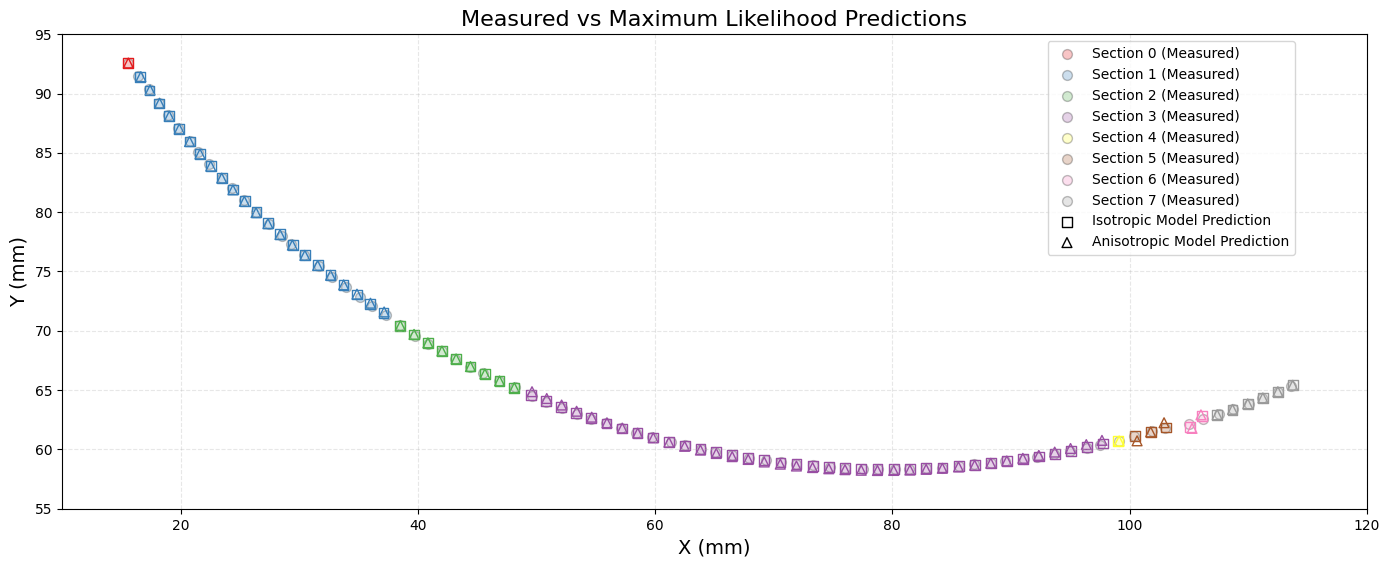

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from src import AntikytheraModel, ml_estimate, plot_mle

parent_path = Path().resolve().parent
data_path = parent_path / "data/1-Fragment_C_Hole_Measurements.csv"

df = pd.read_csv(data_path)
data = np.array(df[['Mean(X)', 'Mean(Y)']])
sections = sorted(df['Section ID'].unique())
sorted_idxs = [list(df[df['Section ID'] == j]['Hole']) for j in sections]

model = AntikytheraModel(data, sorted_idxs)

init_iso = np.concatenate([[350], [100], [1], np.zeros((8, 2)).flatten(), np.zeros(8)])
init_aniso = np.concatenate([[350], [100], [1, 1], np.zeros((8, 2)).flatten(), np.zeros(8)])

print("Finding maximum likelihood parameters for the isotropic model...")
mle_iso = ml_estimate(model, is_aniso=False, init=init_iso)

print("\nFinding maximum likelihood parameters for the anisotropic model...")
mle_aniso = ml_estimate(model, is_aniso=True, init=init_aniso)

# print the parameters
iso_dict = model.unpack_params(mle_iso)
aniso_dict = model.unpack_params(mle_aniso)

print("\nIsotropic model maximum likelihood parameters:")
print(f"N = {iso_dict['N']:.2f}")
print(f"r = {iso_dict['r']:.2f}")
print(f"sigma = {iso_dict['sigma'][0]:.4f}")

print("\nAnisotropic model maximum likelihood parameters:")
print(f"N = {aniso_dict['N']:.2f}")
print(f"r = {aniso_dict['r']:.2f}")
print(f"sigma_r = {aniso_dict['sigma'][0]:.4f}")
print(f"sigma_t = {aniso_dict['sigma'][1]:.4f}")

# plot the results
plot_mle(data, sorted_idxs, mle_iso, mle_aniso)

# save
np.save(parent_path / "results/mle_iso.npy", mle_iso)
np.save(parent_path / "results/mle_aniso.npy", mle_aniso)


#### (f)

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
from src import AntikytheraHMC

parent_path = Path().resolve().parent
data_path = parent_path / "data/1-Fragment_C_Hole_Measurements.csv"

df = pd.read_csv(data_path).drop([0, 69])   #  drop out sections 0, 4 which contain only one hole each
data = np.array(df[['Mean(X)', 'Mean(Y)']])
sections = sorted(df['Section ID'].unique())
sorted_idxs = [list(df[df['Section ID'] == j]['Hole']) for j in sections]

all_df = pd.read_csv(data_path)
all_data = np.array(all_df[['Mean(X)', 'Mean(Y)']])

sampler = AntikytheraHMC(all_data, sorted_idxs)

print('Sampling from posterior of isotropic model...')
iso_trace = sampler.sample(
    n_samples=2000,  
    n_tune=2000,     
    cores=4,        
    target_accept=0.95,  
    is_aniso=False,  
    N_prior=(320, 370),
    r_prior=(60, 90),   
    sigma_prior=(0.001, 0.3),  
    x0j_prior = (70, 90),
    y0j_prior = (125, 145),
    #alpha_prior=(np.radians(-180), np.radians(-90))
    alpha_prior=(-3.0, -2.0)  
)

print('Sampling from posterior of anisotropic model...')
aniso_trace = sampler.sample(
    n_samples=2000,  
    n_tune=2000,    
    cores=4,        
    target_accept=0.95,  
    is_aniso=True,  
    N_prior=(320, 370),
    r_prior=(60, 90),   
    sigma_prior=(0.001, 0.3),  
    x0j_prior = (70, 90),
    y0j_prior = (125, 145),  
    alpha_prior=(-3.0, -2.0) 
    #alpha_prior=(np.radians(-180), np.radians(-90))
)

Sampling from posterior of isotropic model...


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [N, r, sigma, x0_0, y0_0, alpha_0, x0_1, y0_1, alpha_1, x0_2, y0_2, alpha_2, x0_3, y0_3, alpha_3, x0_4, y0_4, alpha_4, x0_5, y0_5, alpha_5]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 1855 seconds.


Sampling from posterior of anisotropic model...


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [N, r, sigma_r, sigma_t, x0_0, y0_0, alpha_0, x0_1, y0_1, alpha_1, x0_2, y0_2, alpha_2, x0_3, y0_3, alpha_3, x0_4, y0_4, alpha_4, x0_5, y0_5, alpha_5]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2075 seconds.


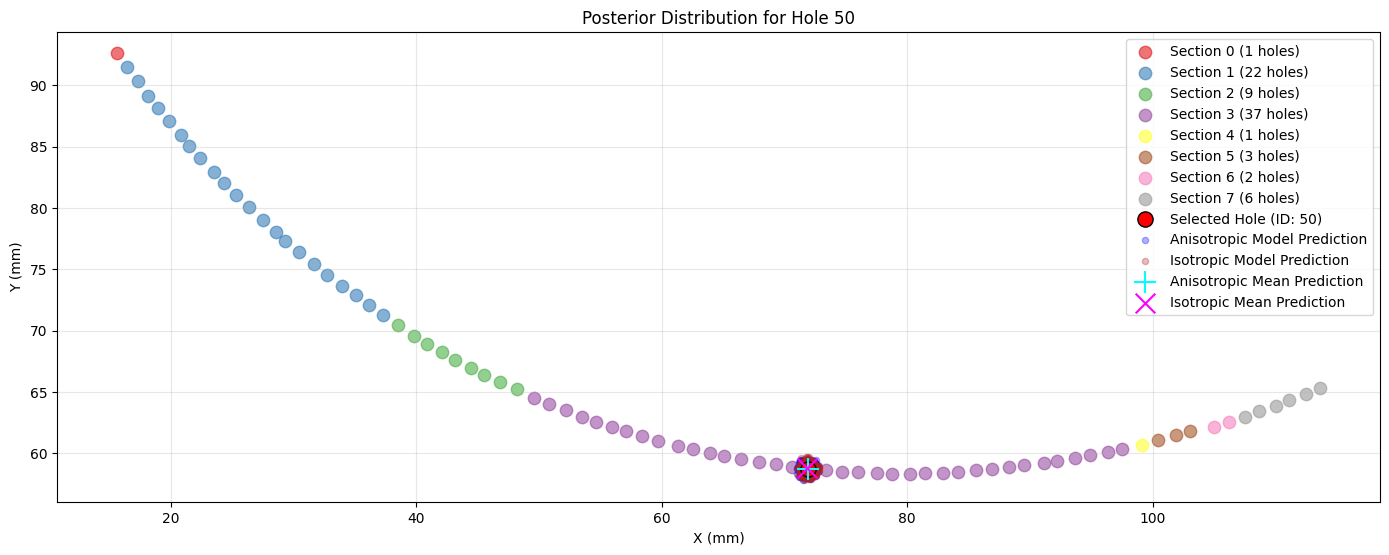


Anisotropic Model Posterior Summary:
            mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
N        352.652  9.717  336.707  369.999       0.28    0.130    1232.0   
r         76.779  2.100   73.175   80.507       0.06    0.028    1232.0   
sigma_r    0.279  0.020    0.241    0.300       0.00    0.000    6660.0   
sigma_t    0.288  0.011    0.267    0.300       0.00    0.000    6662.0   

         ess_tail  r_hat  
N          2642.0    1.0  
r          2640.0    1.0  
sigma_r    4100.0    1.0  
sigma_t    3148.0    1.0  

Isotropic Model Posterior Summary:
          mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
N      352.503  10.163  335.294  369.913      0.295    0.143    1202.0   
r       76.751   2.200   72.871   80.493      0.064    0.031    1205.0   
sigma    0.291   0.008    0.276    0.300      0.000    0.000    6564.0   

       ess_tail  r_hat  
N        2073.0    1.0  
r        2068.0    1.0  
sigma    3353.0    1.0  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import arviz as az
from src import position_samples

parent_path = Path().resolve().parent
data_path = parent_path / "data/1-Fragment_C_Hole_Measurements.csv"
result_path = parent_path / "results"
result_path.mkdir(exist_ok=True)

nsamples=1000
section_idx = 2   # here it's actually S1 cuz S0 was dropped out
hole_idx = 50     # d_{16} in S1

df = pd.read_csv(data_path)
sections = sorted(df['Section ID'].unique())

plt.figure(figsize=(14, 10))

colors = plt.cm.Set1(np.linspace(0, 1, len(sections)))

for i, section in enumerate(sections):
    section_data = df[df['Section ID'] == section]
    plt.scatter(
        section_data['Mean(X)'], 
        section_data['Mean(Y)'],
        s=80,  
        color=colors[i],
        alpha=0.6,
        label=f'Section {section} ({len(section_data)} holes)'
    )

hole_data = df[df['Hole'] == hole_idx]
plt.scatter(
    hole_data['Mean(X)'], 
    hole_data['Mean(Y)'],
    s=120,  
    color="red",
    label=f"Selected Hole (ID: {hole_idx})",
    edgecolor="black",
    zorder=10)

# generate posterior predictive samples for both models
anisotropic_samples = position_samples(aniso_trace, True, hole_idx, section_idx, nsamples)
isotropic_samples = position_samples(iso_trace, False, hole_idx, section_idx, nsamples)

# plot the posterior predictive distributions
plt.scatter(anisotropic_samples[:, 0], anisotropic_samples[:, 1], 
            color="blue", alpha=0.3, label="Anisotropic Model Prediction", s=20)
plt.scatter(isotropic_samples[:, 0], isotropic_samples[:, 1], 
            color="firebrick", alpha=0.3, label="Isotropic Model Prediction", s=20)

# get posterior means for parameters for both models
summary_anisotropic = az.summary(aniso_trace)
summary_isotropic = az.summary(iso_trace)

post_mean_aniso = summary_anisotropic.loc[:, "mean"]
post_mean_iso = summary_isotropic.loc[:, "mean"]

# extract parameters and calculate mean predictions for the selected hole
# anisotropic model
N_mean_aniso = post_mean_aniso["N"]
r_mean_aniso = post_mean_aniso["r"]
x0_mean_aniso = post_mean_aniso[f"x0_{section_idx}"]
y0_mean_aniso = post_mean_aniso[f"y0_{section_idx}"]
alpha_mean_aniso = post_mean_aniso[f"alpha_{section_idx}"]

# isotropic model
N_mean_iso = post_mean_iso["N"]
r_mean_iso = post_mean_iso["r"]
x0_mean_iso = post_mean_iso[f"x0_{section_idx}"]
y0_mean_iso = post_mean_iso[f"y0_{section_idx}"]
alpha_mean_iso = post_mean_iso[f"alpha_{section_idx}"]

# calculate angular position for the selected hole
phi_aniso = 2 * np.pi * (hole_idx - 1) / N_mean_aniso + alpha_mean_aniso
phi_iso = 2 * np.pi * (hole_idx - 1) / N_mean_iso + alpha_mean_iso

# predicted positions using posterior means
x_pred_aniso = x0_mean_aniso + r_mean_aniso * np.cos(phi_aniso)
y_pred_aniso = y0_mean_aniso + r_mean_aniso * np.sin(phi_aniso)

x_pred_iso = x0_mean_iso + r_mean_iso * np.cos(phi_iso)
y_pred_iso = y0_mean_iso + r_mean_iso * np.sin(phi_iso)

# the mean predicted positions
plt.scatter(x_pred_aniso, y_pred_aniso, color="cyan", s=250, marker="+",
            label="Anisotropic Mean Prediction", zorder=10)
plt.scatter(x_pred_iso, y_pred_iso, color="fuchsia", s=200, marker="x",
            label="Isotropic Mean Prediction", zorder=10)

plt.grid(True, alpha=0.3)

#plt.xlim(27, 32)
#plt.ylim(76, 79)
plt.gca().set_aspect('equal', adjustable='box') 

plt.legend()
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title(f"Posterior Distribution for Hole {hole_idx}")

# save
parent_path = Path().resolve().parent
result_path = parent_path / "results"
result_path.mkdir(exist_ok=True)
plt.savefig(result_path / "posterior_distribution.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

# display summary of posterior distributions
print("\nAnisotropic Model Posterior Summary:")
print(az.summary(aniso_trace, var_names=["N", "r", "sigma_r", "sigma_t"]))

print("\nIsotropic Model Posterior Summary:")
print(az.summary(iso_trace, var_names=["N", "r", "sigma"]))


#### (g)

In [ ]:
from src import ModelComparison, AntikytheraHMC
import pandas as pd
import numpy as np
from pathlib import Path
import pickle

parent_path = Path().resolve().parent
data_path = parent_path / "data/1-Fragment_C_Hole_Measurements.csv"
result_path = parent_path / "results"
result_path.mkdir(exist_ok=True)


df = pd.read_csv(data_path).drop([0, 69])   #  drop out sections 0, 4 which contain only one hole each
data = np.array(df[['Mean(X)', 'Mean(Y)']])
sections = sorted(df['Section ID'].unique())
sorted_idxs = [list(df[df['Section ID'] == j]['Hole']) for j in sections]

all_df = pd.read_csv(data_path)
all_data = np.array(all_df[['Mean(X)', 'Mean(Y)']])

sampler = AntikytheraHMC(all_data, sorted_idxs)

comp = ModelComparison(sampler)

# run thermodynamic integration for both models
comp.run_therm_integ(
    name="Isotropic",
    is_aniso=False,
    n_samples=500,
    n_tune=500,
    cores=2
)

comp.run_therm_integ(
    name="Anisotropic",
    is_aniso=True,
    n_samples=500,
    n_tune=500,
    cores=2
)

with open(result_path/"model_comparison.pkl", "wb") as f:
    pickle.dump(comp, f)


In [20]:
with open(result_path/"model_comparison.pkl", "rb") as f:
    comp = pickle.load(f)

In [ ]:
# compare models
better, bf = comp.compare_models()
logZ1 = comp.log_evidence["Isotropic"]
logZ2 = comp.log_evidence["Anisotropic"]

Z1 = np.exp(logZ1)
Z2 = np.exp(logZ2)

print(f"The better model is {better}, the bayes factor is {bf}.\n")
print(f"The approx evidence for isotropic model is: Z1={Z1:.2e}")
print(f"The approx evidence for anisotropic model is: Z2={Z2:.2e}")


The better model is Anisotropic, the bayes factor is 0.051544204031018635.

The approx evidence for isotropic model is: Z1=5.77e-29
The approx evidence for anisotropic model is: Z2=1.12e-27


In [22]:
from tabulate import tabulate
headers = [f"β{i}" for i in range(len(comp.temperatures))]
tab_temperatures = [[f"{i:.1e}" for i in comp.temperatures]]
print("The temperaters used are:")
print(tabulate(tab_temperatures, headers=headers, tablefmt="rounded_grid"))

The temperaters used are:
╭──────┬───────┬─────────┬─────────┬─────────┬────────┬────────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────╮
│   β0 │    β1 │      β2 │      β3 │      β4 │     β5 │     β6 │     β7 │    β8 │    β9 │   β10 │   β11 │   β12 │   β13 │   β14 │   β15 │   β16 │   β17 │   β18 │   β19 │
├──────┼───────┼─────────┼─────────┼─────────┼────────┼────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│    0 │ 4e-07 │ 1.3e-05 │ 9.8e-05 │ 0.00041 │ 0.0013 │ 0.0031 │ 0.0068 │ 0.013 │ 0.024 │  0.04 │ 0.065 │   0.1 │  0.15 │  0.22 │  0.31 │  0.42 │  0.57 │  0.76 │     1 │
╰──────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────╯
